# Linear Regression

- [Libraries](#Libraries)
- [Functions](#Functions)
- [Datasets](#Datasets)
- [Basic Linear Regression](#Basic-Linear-Regression)
- [Multiple Linear Regression](#Multiple-Linear-Regression)
- [Multiple Linear Regression: Inference](#Multiple-Linear-Regression:-Inference)

- [Libraries](#libraries)
- [Functions](#functions)
- [Datasets](#datasets)
- [Basic Linear Regression](#basic-linear-regression)
- [Multiple Linear Regression](#multiple-linear-regression)
- [Multiple Linear Regression: Inference](#multiple-linear-regression-inference)

# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from patsy import dmatrices
from scipy.stats import t


# Functions

<ul>
 <li>Function that plots t-distribution.</li>
</ul>

In [2]:
def t_test_graph(t_value:float,df:int,alpha:float,kind:str,h0_mean:float=0):
    fig, ax = plt.subplots(figsize=(8, 6))

    beta = r"$\beta_j$"
    df = np.round(df,0)

    ax.axvline(x=0, color='k', linestyle='-.')
    ax.axhline(y=0, color='k', linestyle='-.')
    
    # t-distribution
    x = np.linspace(t.ppf(0.001, df, h0_mean),t.ppf(0.999, df, h0_mean),100)
    y = t.pdf(x, df, h0_mean)
    ax.plot(x, y, '-k', label='t-student pdf')

    if kind == 'left':
        ax.vlines(x= t.ppf(alpha, df, h0_mean), ymin = 0, ymax = t.pdf(t.ppf(alpha, df, h0_mean),df, h0_mean), linestyle='-', color = 'blue')
        x_critical =  np.linspace(t.ppf(0.001, df, h0_mean),t.ppf(alpha, df, h0_mean),100)
        y_critical = t.pdf(x_critical, df , h0_mean)
        ax.fill_between(x_critical, y_critical,color='blue', alpha=0.5)

        ax.set_title(f"Rejection Rule of {alpha*100}% for Alternative H1: {beta} < 0 with {df} gl.")
        ax.annotate("% .2f" % t.ppf(alpha, df, h0_mean), 
            xy= (t.ppf(alpha, df, h0_mean),0.01), 
            xytext=(t.ppf(alpha, df, h0_mean)-0.15, -0.02),
            arrowprops=dict(arrowstyle="-"))
    elif kind == 'right':
        ax.vlines(x= t.ppf(1-alpha, df, h0_mean), ymin = 0, ymax = t.pdf(t.ppf(1-alpha, df, h0_mean),df, h0_mean), linestyle='-', color = 'blue')
        x_critical =  np.linspace(t.ppf(1-alpha, df, h0_mean),t.ppf(0.999, df, h0_mean),100)
        y_critical = t.pdf(x_critical, df, h0_mean)
        ax.fill_between(x_critical, y_critical,color='blue', alpha=0.5)

        ax.set_title(f"Rejection Rule of {alpha*100}% for Alternative H1: {beta} > 0 with {df} gl.")
        ax.annotate("% .2f" % t.ppf(1- alpha, df, h0_mean), 
            xy= (t.ppf(1- alpha, df, h0_mean),0.01), 
            xytext=(t.ppf(1- alpha, df, h0_mean)-0.15, -0.02),
            arrowprops=dict(arrowstyle="-"))
    elif kind == 'two-sided':
        ax.vlines(x= t.ppf((alpha/2), df, h0_mean), ymin = 0, ymax = t.pdf(t.ppf((alpha/2), df, h0_mean), df, h0_mean), linestyle='-', color = 'blue')
        ax.vlines(x= t.ppf(1-(alpha/2), df, h0_mean), ymin = 0, ymax = t.pdf(t.ppf(1-(alpha/2), df, h0_mean), df, h0_mean), linestyle='-', color = 'blue')

        x_critical_lower = np.linspace(t.ppf(0.001, df, h0_mean),t.ppf((alpha/2), df, h0_mean),100)
        y_critical_lower = t.pdf(x_critical_lower, df, h0_mean)

        x_critical_upper =  np.linspace(t.ppf(1-(alpha/2), df, h0_mean),t.ppf(0.999, df, h0_mean),100)
        y_critical_upper = t.pdf(x_critical_upper, df, h0_mean)

        ax.fill_between(x_critical_lower, y_critical_lower,color='blue', alpha=0.5)
        ax.fill_between(x_critical_upper, y_critical_upper,color='blue', alpha=0.5)

        ax.set_title(f"Rejection Rule of {alpha*100}% for Alternative H1: |{beta}| > 0 with {df} gl.")
        ax.annotate("% .2f" % t.ppf(1- (alpha/2), df, h0_mean), 
            xy= (t.ppf(1- (alpha/2), df, h0_mean),0.01), 
            xytext=(t.ppf(1- (alpha/2), df, h0_mean) -0.15, -0.02),
            arrowprops=dict(arrowstyle="-"))

        ax.annotate("% .2f" % t.ppf((alpha/2), df, h0_mean), 
            xy= (t.ppf((alpha/2), df, h0_mean),0.01), 
            xytext=(t.ppf((alpha/2), df, h0_mean)-0.15, -0.02),
            arrowprops=dict(arrowstyle="-"))

    height = t.pdf(t.ppf(0.5, df, h0_mean), df, h0_mean) + 0.01
    ax.set_ylim(-0.03,height)

    ax.annotate("% .2f" % t_value, 
            xy= (t_value,0), 
            xytext=(t_value-0.15, -0.06),
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="-"))

# Datasets

In [3]:
file_path_ceosal = '../Datasets/ceosal1.xls'
file_path_wage = '../Datasets/wage1.xls'
file_path_vote = '../Datasets/vote1.xls'
file_path_gpa = '../Datasets/gpa1.xls'
file_path_meap = '../Datasets/meap93.xls'
file_path_campus = '../Datasets/campus.xls'

In [4]:
df_ceosal = pd.read_excel(file_path_ceosal)
df_wage = pd.read_excel(file_path_wage)
df_vote = pd.read_excel(file_path_vote)
df_gpa = pd.read_excel(file_path_gpa)
df_meap = pd.read_excel(file_path_meap)
df_campus= pd.read_excel(file_path_campus)

# Basic Linear Regression

<ul>
    <li>
        <h4>Ejemplo 2.3</h4>
    </li>
</ul>

<p>Dependent Variable: CEO salary in thoushands (salary).</p>
<p>Independent Variables:</p>
<ol>
    <li>roe: Return on Equity.</li>
</ol> 

In [27]:
model = smf.ols(
    formula = 'salary ~ roe', 
    data = df_ceosal
).fit()

print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431


In [17]:
print("R2: %.3f" % model.rsquared)

R2: 0.013


<ul>
    <li>
        <h4>Ejemplo 2.4</h4>
    </li>
</ul>

<p>Dependent Variable: Average Hourly Earnings (wage).</p>
<p>Independent Variables:</p>
<ol>
    <li>educ: Years of education.</li>
</ol> 

In [19]:
model = smf.ols(
    formula = 'wage ~ educ',
    data = df_wage
).fit()

print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646


In [20]:
print("R2: %.3f" % model.rsquared)

R2: 0.165


<ul>
    <li>
        <h4>Ejemplo 2.5</h4>
    </li>
</ul>

<p>Dependent Variable: Percent vote for A (voteA).</p>
<p>Independent Variables:</p>
<ol>
    <li>expendA: campaign expends. by A, $1000s.</li>
    <li>expendB: campaign expends. by B, $1000s.</li>
    <li>shareA: 100*(expendA/(expendA+expendB)).</li>
</ol> 

In [21]:
model = smf.ols(
    formula = 'voteA ~ shareA',
    data = df_vote
).fit()

print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8125      0.887     30.222      0.000      25.061      28.564
shareA         0.4638      0.015     31.901      0.000       0.435       0.493


In [22]:
print("R2: %.3f" % model.rsquared)

R2: 0.856


## Incorporating nonlinearities in Simple Regression

<ul>
    <li>
        <h4>Ejemplo 2.10</h4>
    </li>
</ul>

<p>Dependent Variable: Logarithmic of Average Hourly Earnings (lwage).</p>
<p>Independent Variables:</p>
<ol>
    <li>educ: Years of education.</li>
</ol> 

In [23]:
model = smf.ols(
    formula = 'lwage ~ educ',
    data = df_wage
).fit()

print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098


In [24]:
print("R2: %.3f" % model.rsquared)

R2: 0.186


<ul>
    <li>
        <h4>Ejemplo 2.11</h4>
    </li>
</ul>

<p>Dependent Variable: Logarithmic of CEO salary in thoushands (lsalary).</p>
<p>Independent Variables:</p>
<ol>
    <li>lsales: Natural log of sales.</li>
</ol> 

In [25]:
model = smf.ols(
    formula = 'lsalary ~ lsales',
    data = df_ceosal
).fit()

print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8220      0.288     16.723      0.000       4.254       5.390
lsales         0.2567      0.035      7.436      0.000       0.189       0.325


In [26]:
print("R2: %.3f" % model.rsquared)

R2: 0.211


## Multiple Linear Regression

<ul>
 <li> Average hourly earnings explained as function of years of education and years of experience.</li>
</ul>

In [ ]:
model1 = smf.ols(
    formula = 'wage ~ educ + exper',
    data = df_wage
).fit()

model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.3905,0.767,-4.423,0.000,-4.896,-1.885
educ,0.6443,0.054,11.974,0.000,0.539,0.750
exper,0.0701,0.011,6.385,0.000,0.049,0.092


<ul>
 <li> College Grade Point Average explained as function of High School Grade Point Average and Achievement Score.</li>
</ul>

In [ ]:
model2 = smf.ols(
    formula = 'colGPA ~ hsGPA + ACT',
    data = df_gpa
).fit()

model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.2863,0.341,3.774,0.000,0.612,1.960
hsGPA,0.4535,0.096,4.733,0.000,0.264,0.643
ACT,0.0094,0.011,0.875,0.383,-0.012,0.031


<ul>
 <li> Log hourly wage explained as function of years of education, years of experience and years with current employer.</li>
</ul>

In [ ]:
y, X = dmatrices('lwage ~ educ + exper + tenure', data= df_wage, return_type= 'dataframe')

In [ ]:
mod = sm.OLS(y,X)
res = mod.fit()

print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           9.13e-43
Time:                        16:18:44   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2844      0.104      2.729      0.0

In [ ]:
res.use_t

True

In [ ]:
res.normalized_cov_params

Type:            RegressionResultsWrapper
String form:     <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fe570821150>
File:            ~/anaconda3/envs/py/lib/python3.10/site-packages/statsmodels/regression/linear_model.py
Docstring:      
Results class for for an OLS model.

Parameters
----------
model : RegressionModel
    The regression model instance.
params : ndarray
    The estimated parameters.
normalized_cov_params : ndarray
    The normalized covariance parameters.
scale : float
    The estimated scale of the residuals.
cov_type : str
    The covariance estimator used in the results.
cov_kwds : dict
    Additional keywords used in the covariance specification.
use_t : bool
    Flag indicating to use the Student's t in inference.
**kwargs
    Additional keyword arguments used to initialize the results.

See Also
--------
RegressionResults
    Results store for WLS and GLW models.

Notes
-----
Most of the methods and attributes are inherited from Reg

## Multiple Linear Regression: Inference

<ul>
    <li>
        <h4>Ejemplo 4.1</h4>
    </li>
</ul>

<p>Dependent Variable: Logarithmic of Average Hourly Earnings (lwage).</p>
<p>Independent Variables:</p>
<ol>
    <li>educ: Years of education.</li>
    <li>exper: Years potential experience.</li>
    <li>tenure: Years with current employer</li>
</ol> 

In [ ]:
y = df_wage.lwage
X = df_wage[['educ','exper','tenure']]
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2844      0.104      2.729      0.007       0.080       0.489
educ           0.0920      0.007     12.555      0.000       0.078       0.106
exper          0.0041      0.002      2.391      0.017       0.001       0.008
tenure         0.0221      0.003      7.133      0.000       0.016       0.028


In [ ]:
print("R2: %.3f" % results.rsquared)

R2: 0.316


<p>Null Hypothesis: exper = 0</p>
<p>Alternative Hypothesis: exper > 0</p>

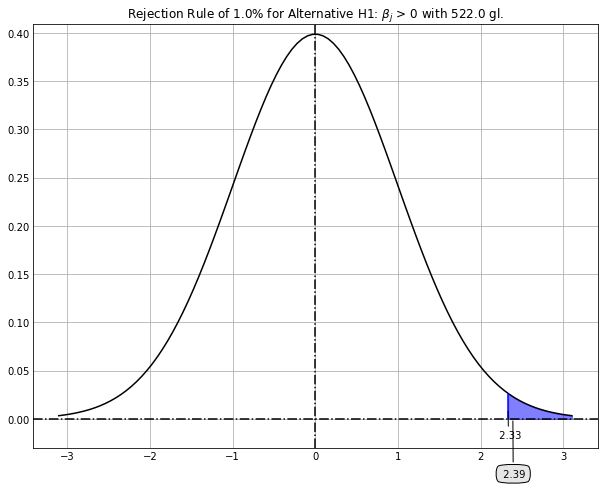

In [ ]:
t_value = results.tvalues['exper']
df = results.df_resid
alpha = 0.01

t_test_graph(t_value,df,alpha,kind = 'right')

<ul>
    <li>
        <h4>Ejemplo 4.2</h4>
    </li>
</ul>

<p>Dependent Variable: Percentage of students passing MEAP math (math10).*</p>
<p>Independent Variables:</p>
<ol>
    <li>salary: Avg. teacher salary.</li>
    <li>benefits: Avg. teacher benefits.</li>
    <li>totcomp: salary + benefits.</li>
    <li>staff: Staff per 1000 students.</li>
    <li>enroll: School enrollment.</li>
</ol>
<p>* MEAP: Michigan Educational Assessment Program</p>

In [ ]:
y = df_meap.math10
X = df_meap[['totcomp','staff','enroll']]
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2740      6.114      0.372      0.710      -9.745      14.293
totcomp        0.0005      0.000      4.570      0.000       0.000       0.001
staff          0.0479      0.040      1.204      0.229      -0.030       0.126
enroll        -0.0002      0.000     -0.918      0.359      -0.001       0.000


In [ ]:
print("R2: %.3f" % results.rsquared)

R2: 0.054


<p>Null Hypothesis: enroll = 0</p>
<p>Alternative Hypothesis: enroll < 0</p>

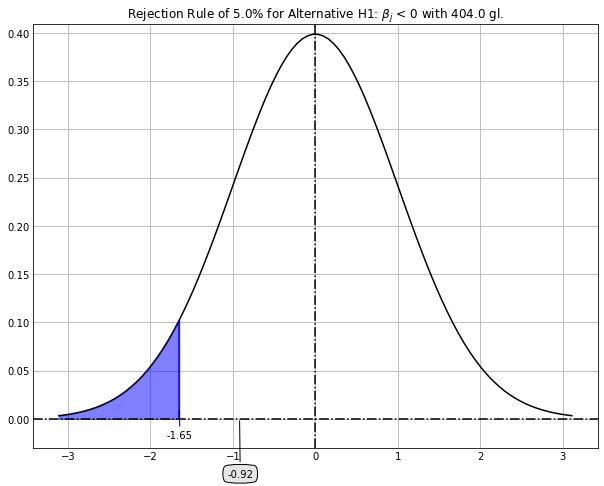

In [ ]:
t_value = results.tvalues['enroll']
df = results.df_resid
alpha = 0.05

t_test_graph(t_value,df,alpha,kind = 'left')

<p>Dependent Variable: Percentage of students passing MEAP math (math10).*</p>
<p>Independent Variables:</p>
<ol>
    <li>ltotcomp: Logarithmic of totcomp.</li>
    <li>lstaff: Logarithmic of staff.</li>
    <li>lenroll: Logarithmic of enroll.</li>
</ol>
<p>* MEAP: Michigan Educational Assessment Program</p>

In [ ]:
y = df_meap.math10
X = df_meap[['ltotcomp','lstaff','lenroll']]
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -207.6647     48.703     -4.264      0.000    -303.408    -111.922
ltotcomp      21.1550      4.056      5.216      0.000      13.182      29.128
lstaff         3.9800      4.190      0.950      0.343      -4.256      12.216
lenroll       -1.2680      0.693     -1.829      0.068      -2.631       0.095


In [ ]:
print("R2: %.3f" % results.rsquared)

R2: 0.065


<p>Null Hypothesis: lenroll = 0</p>
<p>Alternative Hypothesis: lenroll < 0</p>

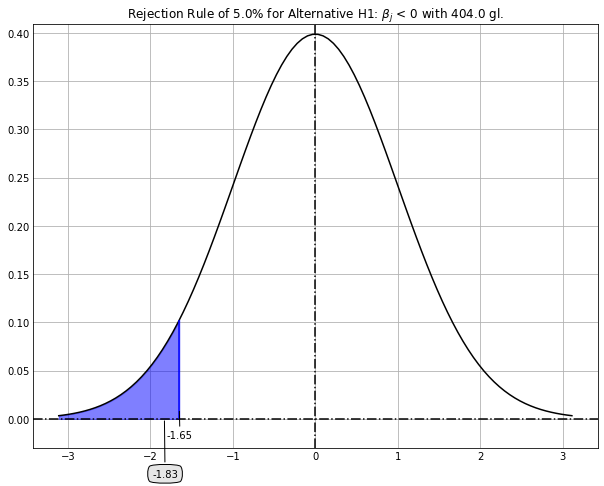

In [ ]:
t_value = results.tvalues['lenroll']
df = results.df_resid
alpha = 0.05

t_test_graph(t_value,df,alpha,kind = 'left')

<ul>
    <li>
        <h4>Ejemplo 4.3</h4>
    </li>
</ul>

<p>Dependent Variable: Grade Point Average (colGPA).</p>
<p>Independent Variables:</p>
<ol>
    <li>hsGPA: High school GPA.</li>
    <li>ACT: Achievement score.</li>
    <li>skipped: Avg lectures missed per week.</li>
</ol>

In [ ]:
y = df_gpa.colGPA
X = df_gpa[['hsGPA','ACT','skipped']]
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3896      0.332      4.191      0.000       0.734       2.045
hsGPA          0.4118      0.094      4.396      0.000       0.227       0.597
ACT            0.0147      0.011      1.393      0.166      -0.006       0.036
skipped       -0.0831      0.026     -3.197      0.002      -0.135      -0.032


In [ ]:
print("R2: %.3f" % results.rsquared)

R2: 0.234


<p>Null Hypothesis: skipped  = 0</p>
<p>Alternative Hypothesis: |skipped| > 0</p>

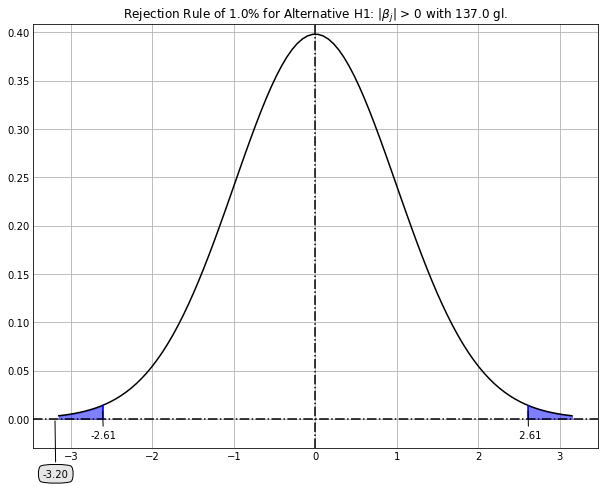

In [ ]:
t_value = results.tvalues['skipped']
df = results.df_resid
alpha = 0.01

t_test_graph(t_value,df,alpha,kind = 'two-sided')

<ul>
    <li>
        <h4>Ejemplo 4.4</h4>
    </li>
</ul>

<p>Dependent Variable: Logarithmic of Total Campus Crimes (lcrime).</p>
<p>Independent Variables:</p>
<ol>
    <li>enroll: Total enrollment.</li>
    <li>lenroll: Logarithmic of total enrollment.</li>
</ol>

In [ ]:
y = df_campus.lcrime
X = df_campus[['lenroll']]
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6314      1.034     -6.416      0.000      -8.683      -4.580
lenroll        1.2698      0.110     11.567      0.000       1.052       1.488


In [ ]:
print("R2: %.3f" % results.rsquared)

R2: 0.585


<p>Null Hypothesis: lenroll  = 1</p>
<p>Alternative Hypothesis: lenroll > 1</p>

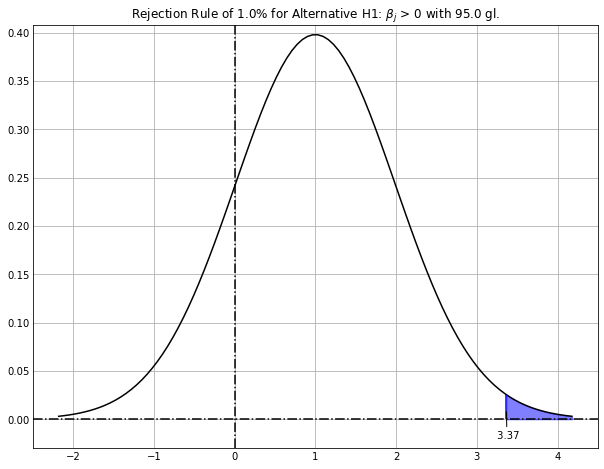

In [ ]:
t_value = results.tvalues['lenroll']
df = results.df_resid
alpha = 0.01

t_test_graph(t_value,df,alpha,kind = 'right',h0_mean=1)

In [ ]:
t_value

11.566826888885652

<ul>
    <li>
        <h4>Ejemplo 4.5</h4>
    </li>
</ul>

<p>Dependent Variable: Logarithmic of House Price (lprice).</p>
<p>Independent Variables:</p>
<ol>
    <li>nox: Nitrous Oxide, parts per 100 mill.</li>
    <li>dist: Weighted dist. to 5 employ centers.</li>
</ol>

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.2698      0.110      2.457      0.016       1.052       1.488


In [ ]:
t = (1.488 - 1.2698)/0.110
t

1.9836363636363632

In [ ]:
results.summary().tables[0]

Dep. Variable:,lcrime,R-squared:,0.585
Model:,OLS,Adj. R-squared:,0.580
Method:,Least Squares,F-statistic:,133.8
Date:,"Fri, 02 Dec 2022",Prob (F-statistic):,7.83e-20
Time:,00:31:38,Log-Likelihood:,-125.83
No. Observations:,97,AIC:,255.7
Df Residuals:,95,BIC:,260.8
Df Model:,1,,
Covariance Type:,nonrobust,,
